# Background

In this project I will examine a datset from a bank in an attempt to build a model that will help the bank reverse the decrease in credit card users they are currently experiencing. As I explore the data I want to drop any insignificant variables to minimize any noise in the dataset. Once I eliminate the insignificant variables I will perform feature engineering on the dataset to build a model that can predict which customers are more likely to use their credit card, and identify which features are most important in making a prediction. In this case predicting a customer will use their credit card and they actually don't is very harmful to the bank, because it results in loss of money and resources.  

# Objective
* To predict those customers who might have a big chance of using their credit cards
* Which features are the most important in the model(s) predication 

# Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else
"Existing Customer" (target variable)
* Customer_Age: Age in Years
* Gender: The gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown,
Uneducated, College (refers to a college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

# Importing Libraries 

In [ ]:
pip install xgboost

In [ ]:
pip install nb_black

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [ ]:
pip install imbalanced-learn==0.8.0

In [ ]:
pip install delayed 

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np
import io

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")



# Loading Data

In [4]:
bank_churning = pd.read_csv("bank_churning.csv")

<IPython.core.display.Javascript object>

In [5]:
data = bank_churning.copy()

<IPython.core.display.Javascript object>

# Data Exploration 


## Shape of Dataset

In [6]:
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

Observations: 
* There are 10,127 rows, and 2 columns. 

## Viewing first and last 5 rows

In [7]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [ ]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

In [ ]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

Observations:
* Attrition_flag, Gender, Education_Level, Maritial_Status, Income_Category, Card_Category are all objects. All the other features are numerical. 
* Education_Level and Marital_Status are missing values. 

## Checking for duplicates 

In [8]:
data.duplicated().sum()

0

Observations:
* No duplicated values. 

## Percentage of missing values

In [8]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

Observations:
* I am not dropping any features based on missing values, because none of them are missing more than 35% of its values. 
* Education_Level is missing 15% of it's values. 
* Marital_Status is missing 7.4% of its values. 

# Statistical Summary of Numerical Features

In [11]:
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

Observations: 
* Age has a wide range between 26 and 73. 
* The max credit limit is 34,516.
* The max credit limit is far greater than the average credit limit. 
* The average transaction count is 65 and the average transaction amount is 
4,404.


# Statistical Summary for Categorical Features

In [10]:
data.describe(exclude=np.number).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

Observations: 
* Most of the dataset are existing customers. 


# Data Processing 

* We can drop the "CLIENTNUM" column because it is an unique identifier and does not add value to the model.

In [9]:
# Dropping column - CLIENTNUM
data.drop(columns=["CLIENTNUM"], inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

Observations: 
* Most of the dataset is existing customers.
* Only 748 people are divorced.
* Majority of customers have a blue card
* Most customers make less than $40,000 annually. 
* 1112 customer's income is unknown.  

# EDA 

## Univariate

### 1. Numerical Features

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Customer Age

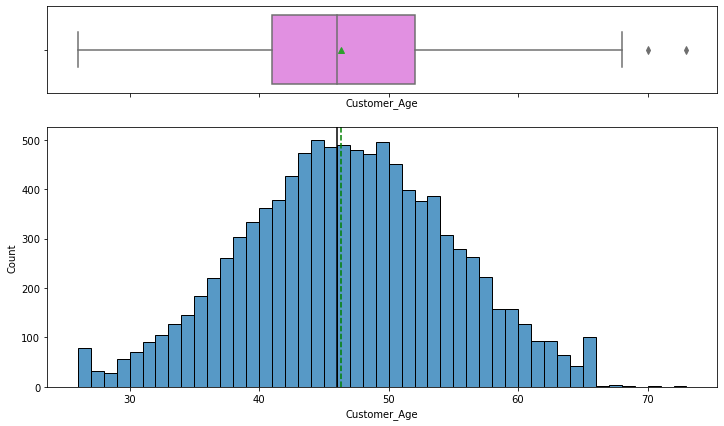

In [15]:
# Observations on Customer_age
histogram_boxplot(data, "Customer_Age")

Observations:
* Age has a normal distribution with almost even mean and medians. 
* There are a few outliers that we can cap with the next highest value. 


In [12]:
data[data["Customer_Age"] >= 70]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
251  Existing Customer            73      M                0     High School   
254  Existing Customer            70      M                0     High School   

    Marital_Status Income_Category Card_Category  Months_on_book  \
251        Married     $40K - $60K          Blue              36   
254        Married  Less than $40K          Blue              56   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
251                         5                       3                      2   
254                         3                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251      4469.000                 1125         3344.000                 1.363   
254      3252.000                 1495         1757.000                 0.581   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34                1.615   
254             1227              15                0.875   

     Avg_Utilization_Ratio  
251                  0.252  
254                  0.460

<IPython.core.display.Javascript object>

In [13]:
# Capping values customer age at 69
data["Customer_Age"].clip(upper=69, inplace=True)

<IPython.core.display.Javascript object>

### Dependent Count

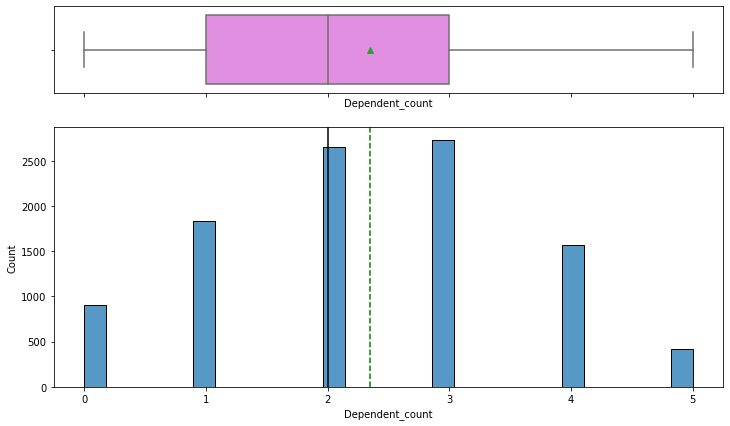

In [18]:
histogram_boxplot(data, "Dependent_count")

Observations: 
* Dependent count is normally distributed. 
* Most people have 3 dependents. 

### Months with the Bank

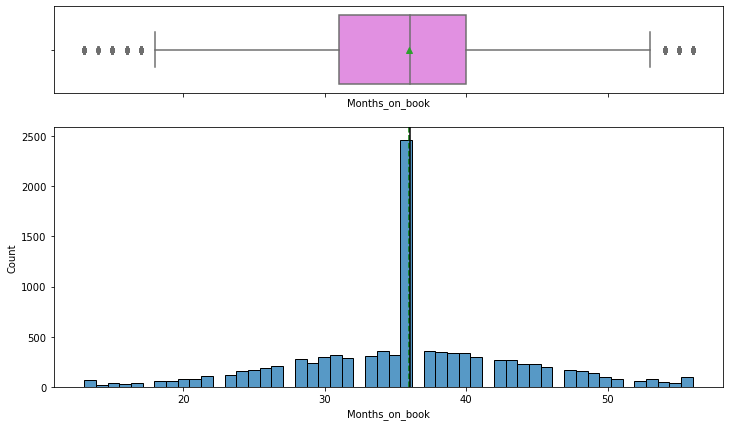

In [19]:
histogram_boxplot(data, "Months_on_book")

Observations:
* How long someone has been with the bank is normallt distributed. 
* The mean and median are the same. 

### Total Number of Products with the Bank

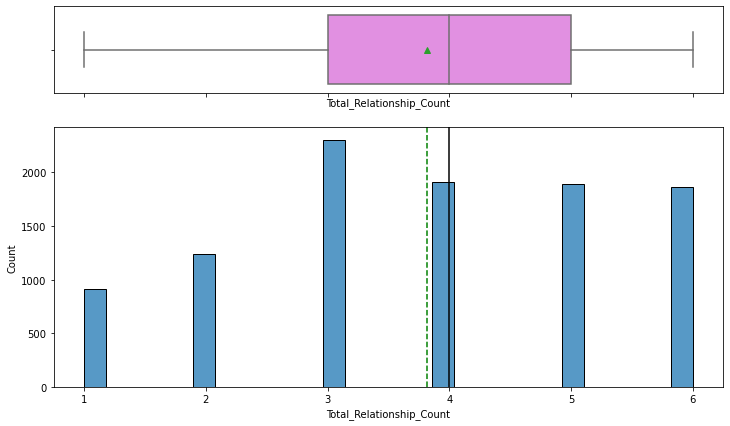

In [20]:
histogram_boxplot(data, "Total_Relationship_Count")

Observations: 
* The max number of products a customer holds is 6. 
* This feature is left skewed. 
* Most people have 3 products.

### Number of Months Inactive

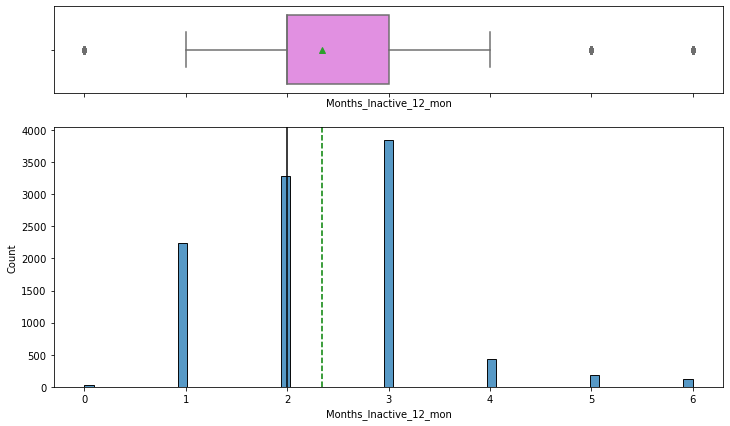

In [21]:
histogram_boxplot(data, "Months_Inactive_12_mon")

Observations:
* The data is right-skewed. 
* Most individuals have been inactive for 3 or less months. 

### Number of Contacts

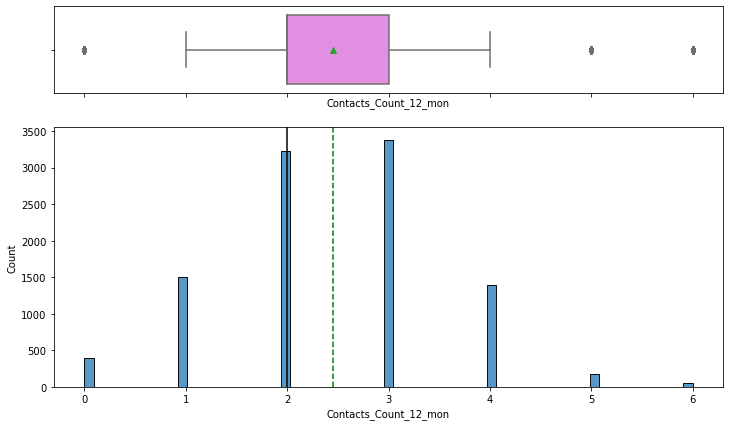

In [22]:
histogram_boxplot(data, "Contacts_Count_12_mon")

### Credit Limit

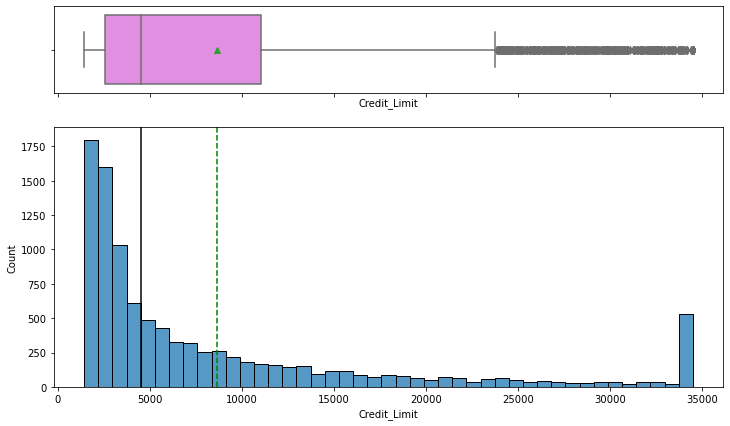

In [23]:
histogram_boxplot(data, "Credit_Limit")

Observations:
* The data is right-skewed. 
* The average credit limit is less than $10,000.
* There are some outliers. 

### Unpaid Balance

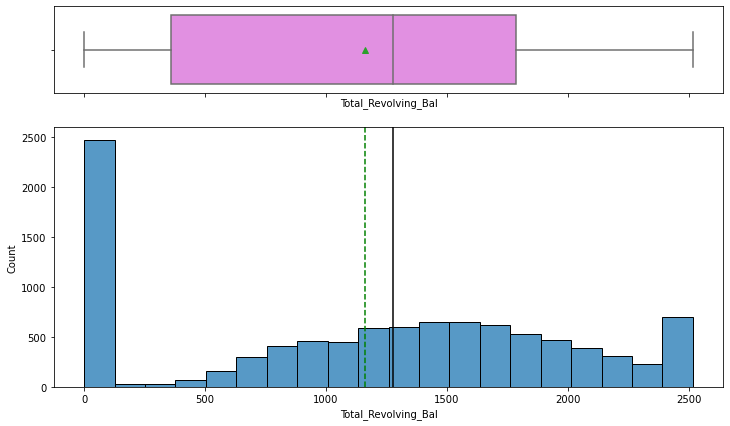

In [24]:
histogram_boxplot(data, "Total_Revolving_Bal")

Observations: 
* Most individuals have no revolving balance. 

### Leftover Available Amount

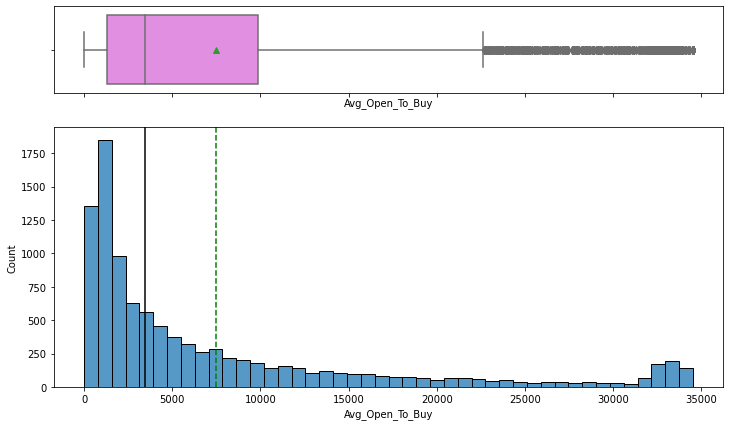

In [25]:
histogram_boxplot(data, "Avg_Open_To_Buy")

Observations:
* This feature is right-skewed. 

* It makes sense that the average "Avg_open_To_buy" is less than $10,000,

 because  the  average credit limit is less than $10,000.

* This feature represents the average amount left on the credit card to spend. 

### Change in Transaction Amount Q4-Q1

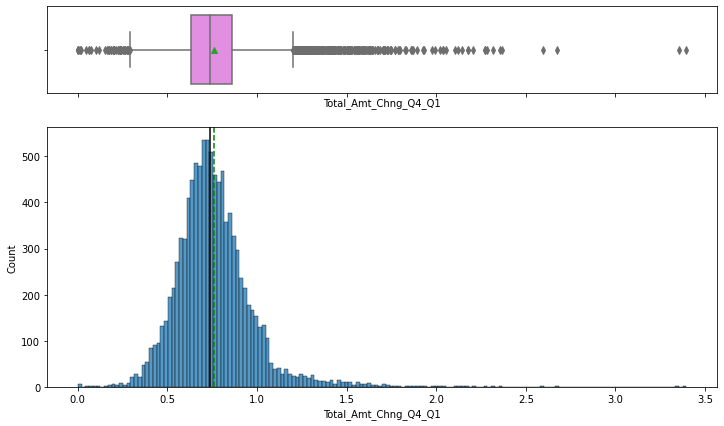

In [26]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

Observations:
* This feature represents the change in transaction amount from Q4 to Q1. 
* This feature has some outliers. 
* The average and median are very close. 


In [27]:
data[data["Total_Amt_Chng_Q4_Q1"] > 3.0] 

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
8   Existing Customer            37      M                3      Uneducated   
12  Existing Customer            56      M                1         College   

   Marital_Status Income_Category Card_Category  Months_on_book  \
8          Single     $60K - $80K          Blue              36   
12         Single    $80K - $120K          Blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
8                          5                       2                      0   
12                         3                       6                      0   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
8      22352.000                 2517        19835.000                 3.355   
12     11751.000                    0        11751.000                 3.397   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
8              1350              24                1.182   
12             1539              17                3.250   

    Avg_Utilization_Ratio  
8                   0.113  
12                  0.000

In [14]:
# Capping values for total amount of change to 3.0
data["Total_Amt_Chng_Q4_Q1"].clip(upper=3.0, inplace=True)

<IPython.core.display.Javascript object>

### Total Transaction Amount

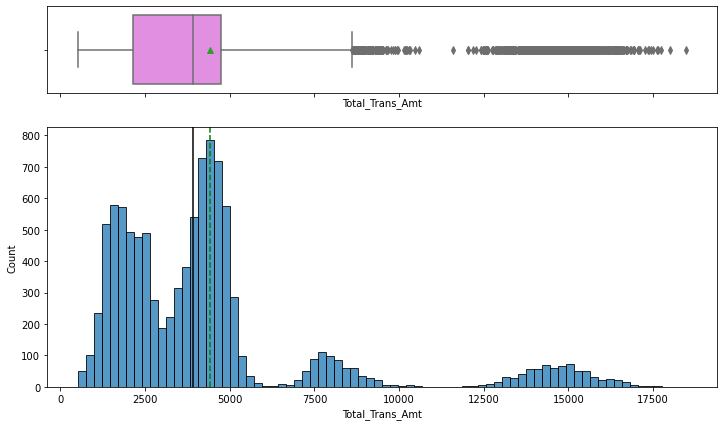

In [29]:
histogram_boxplot(data, "Total_Trans_Amt")

Observations: 
*  The average total transaction amount is less than $5,000.
* This feature is right-skewed with many outliers.

*  More than 50% of the dataset has a total transaction amount less than $5,000.

### Total Number of Transactions

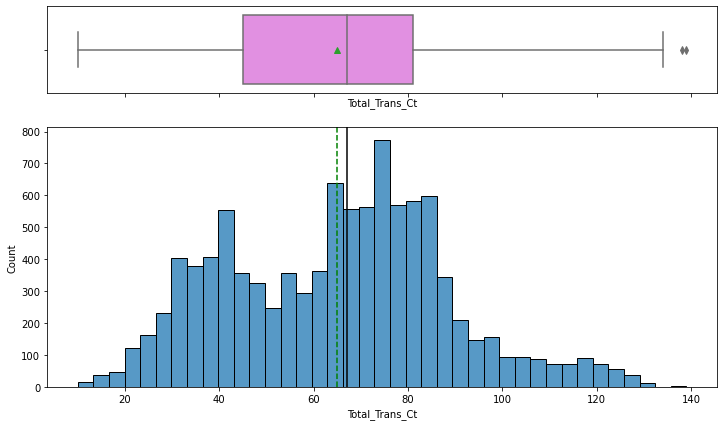

In [30]:
histogram_boxplot(data, "Total_Trans_Ct")

Observations: 
* The total transaction count is normally distributed, with a few outliers.
* More than 50% of the dataset has a total transaction count less than 80.


In [31]:
data[data["Total_Trans_Ct"]> 135]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9324  Existing Customer            41      M                3             NaN   
9586  Existing Customer            56      F                1     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9324        Married         $120K +          Blue              33   
9586        Married             abc          Blue              49   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9324                         2                       4                      3   
9586                         1                       2                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9324     34516.000                  638        33878.000   
9586     17542.000                 2517        15025.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9324                 0.724            13085             139   
9586                 0.800            13939             138   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9324                0.675                  0.018  
9586                0.792                  0.143

In [15]:
# Capping values for total transactions count at 135
data["Total_Trans_Ct"].clip(upper=135, inplace=True)

<IPython.core.display.Javascript object>

### Change in Transaction Count Q4-Q1

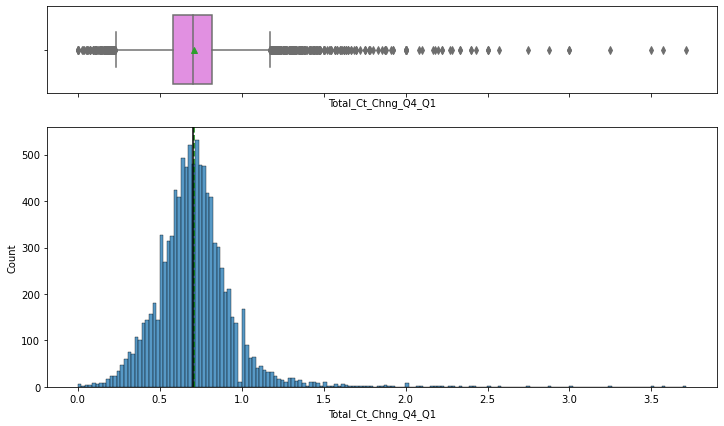

In [33]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

Observations:
* The change in transaction counts from Q4 to Q1 is normally distributed. 
* This feature has some outliers.


### Average Utilization Ratio

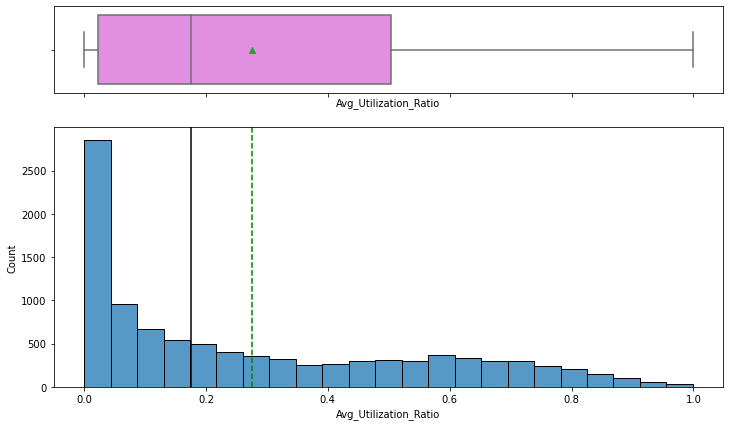

In [34]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

Observations:
* Card utilization ratio is right-skewed. 
* 50% of the dataset have an average ratio less than 0.2.
* Their are no outliers. 

### 2. Categorical Features

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Attrition Flag

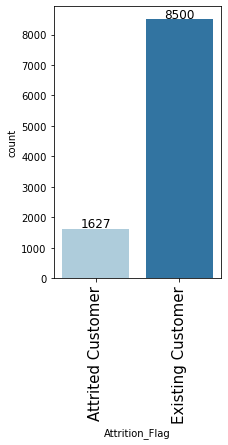

In [36]:
# observations on the target variable. 
labeled_barplot(data, "Attrition_Flag")

Observations: 
* 6,873 more customers are existing than attrited. 

### Gender

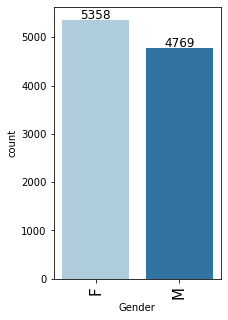

In [37]:
labeled_barplot(data, "Gender")

Observations:
Their are more females than males in the dataset. 

### Education Level

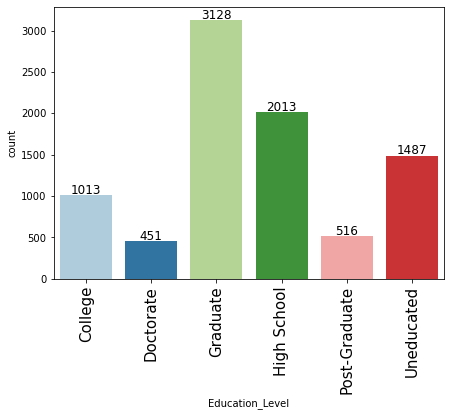

In [38]:
labeled_barplot(data, "Education_Level")

Observations:
* Most of the dataset has Graduate degrees. 
* Surprisingly the 2nd highest is High School instead of college

### Marital Status

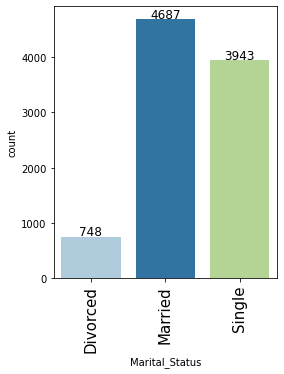

In [39]:
labeled_barplot(data, "Marital_Status")

Observations:
* Not very many people in the dataset are divorced. 

### Income Category

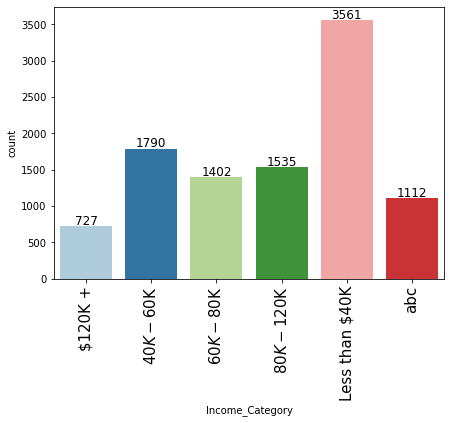

In [40]:
labeled_barplot(data, "Income_Category")

Observations:
* This feature has some unknown(abc) values. 
* Most of the dataset have an annual income less than 40,000. 

### Card Category

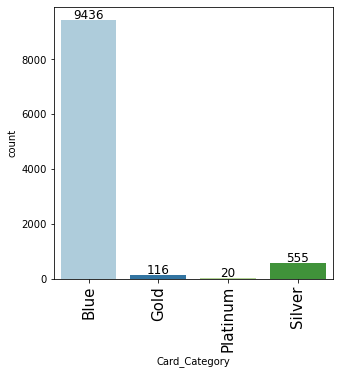

In [41]:
labeled_barplot(data, "Card_Category")

Observations:
* Majority of the dataset have blue cards. 

# Bivariate Analysis

### 1. Numerical Features 

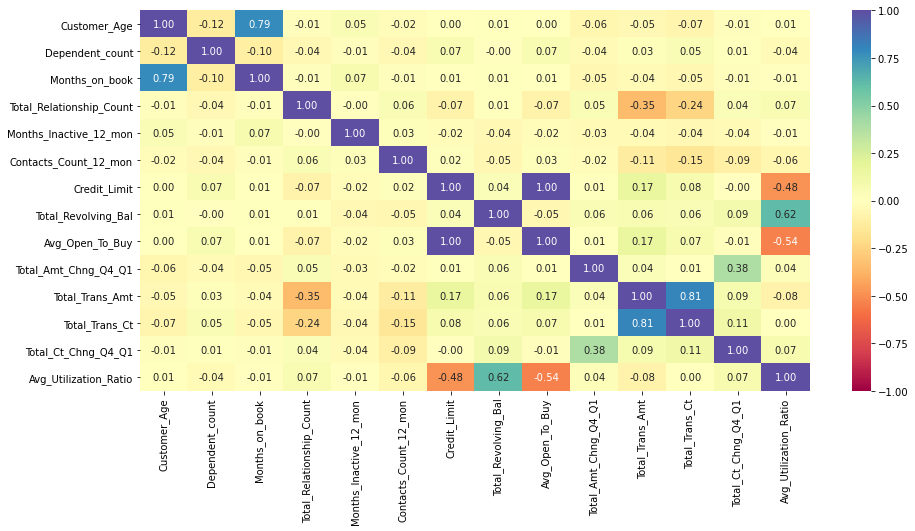

<IPython.core.display.Javascript object>

In [17]:
# let's see the correlation between the numerical features
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
* The following features have very high correlation, and one of them can be dropped:
** Months on books and customer age (79%)
** Credit limit and average open to buy (100%)
** Total transaction amount and total transaction count (81%)


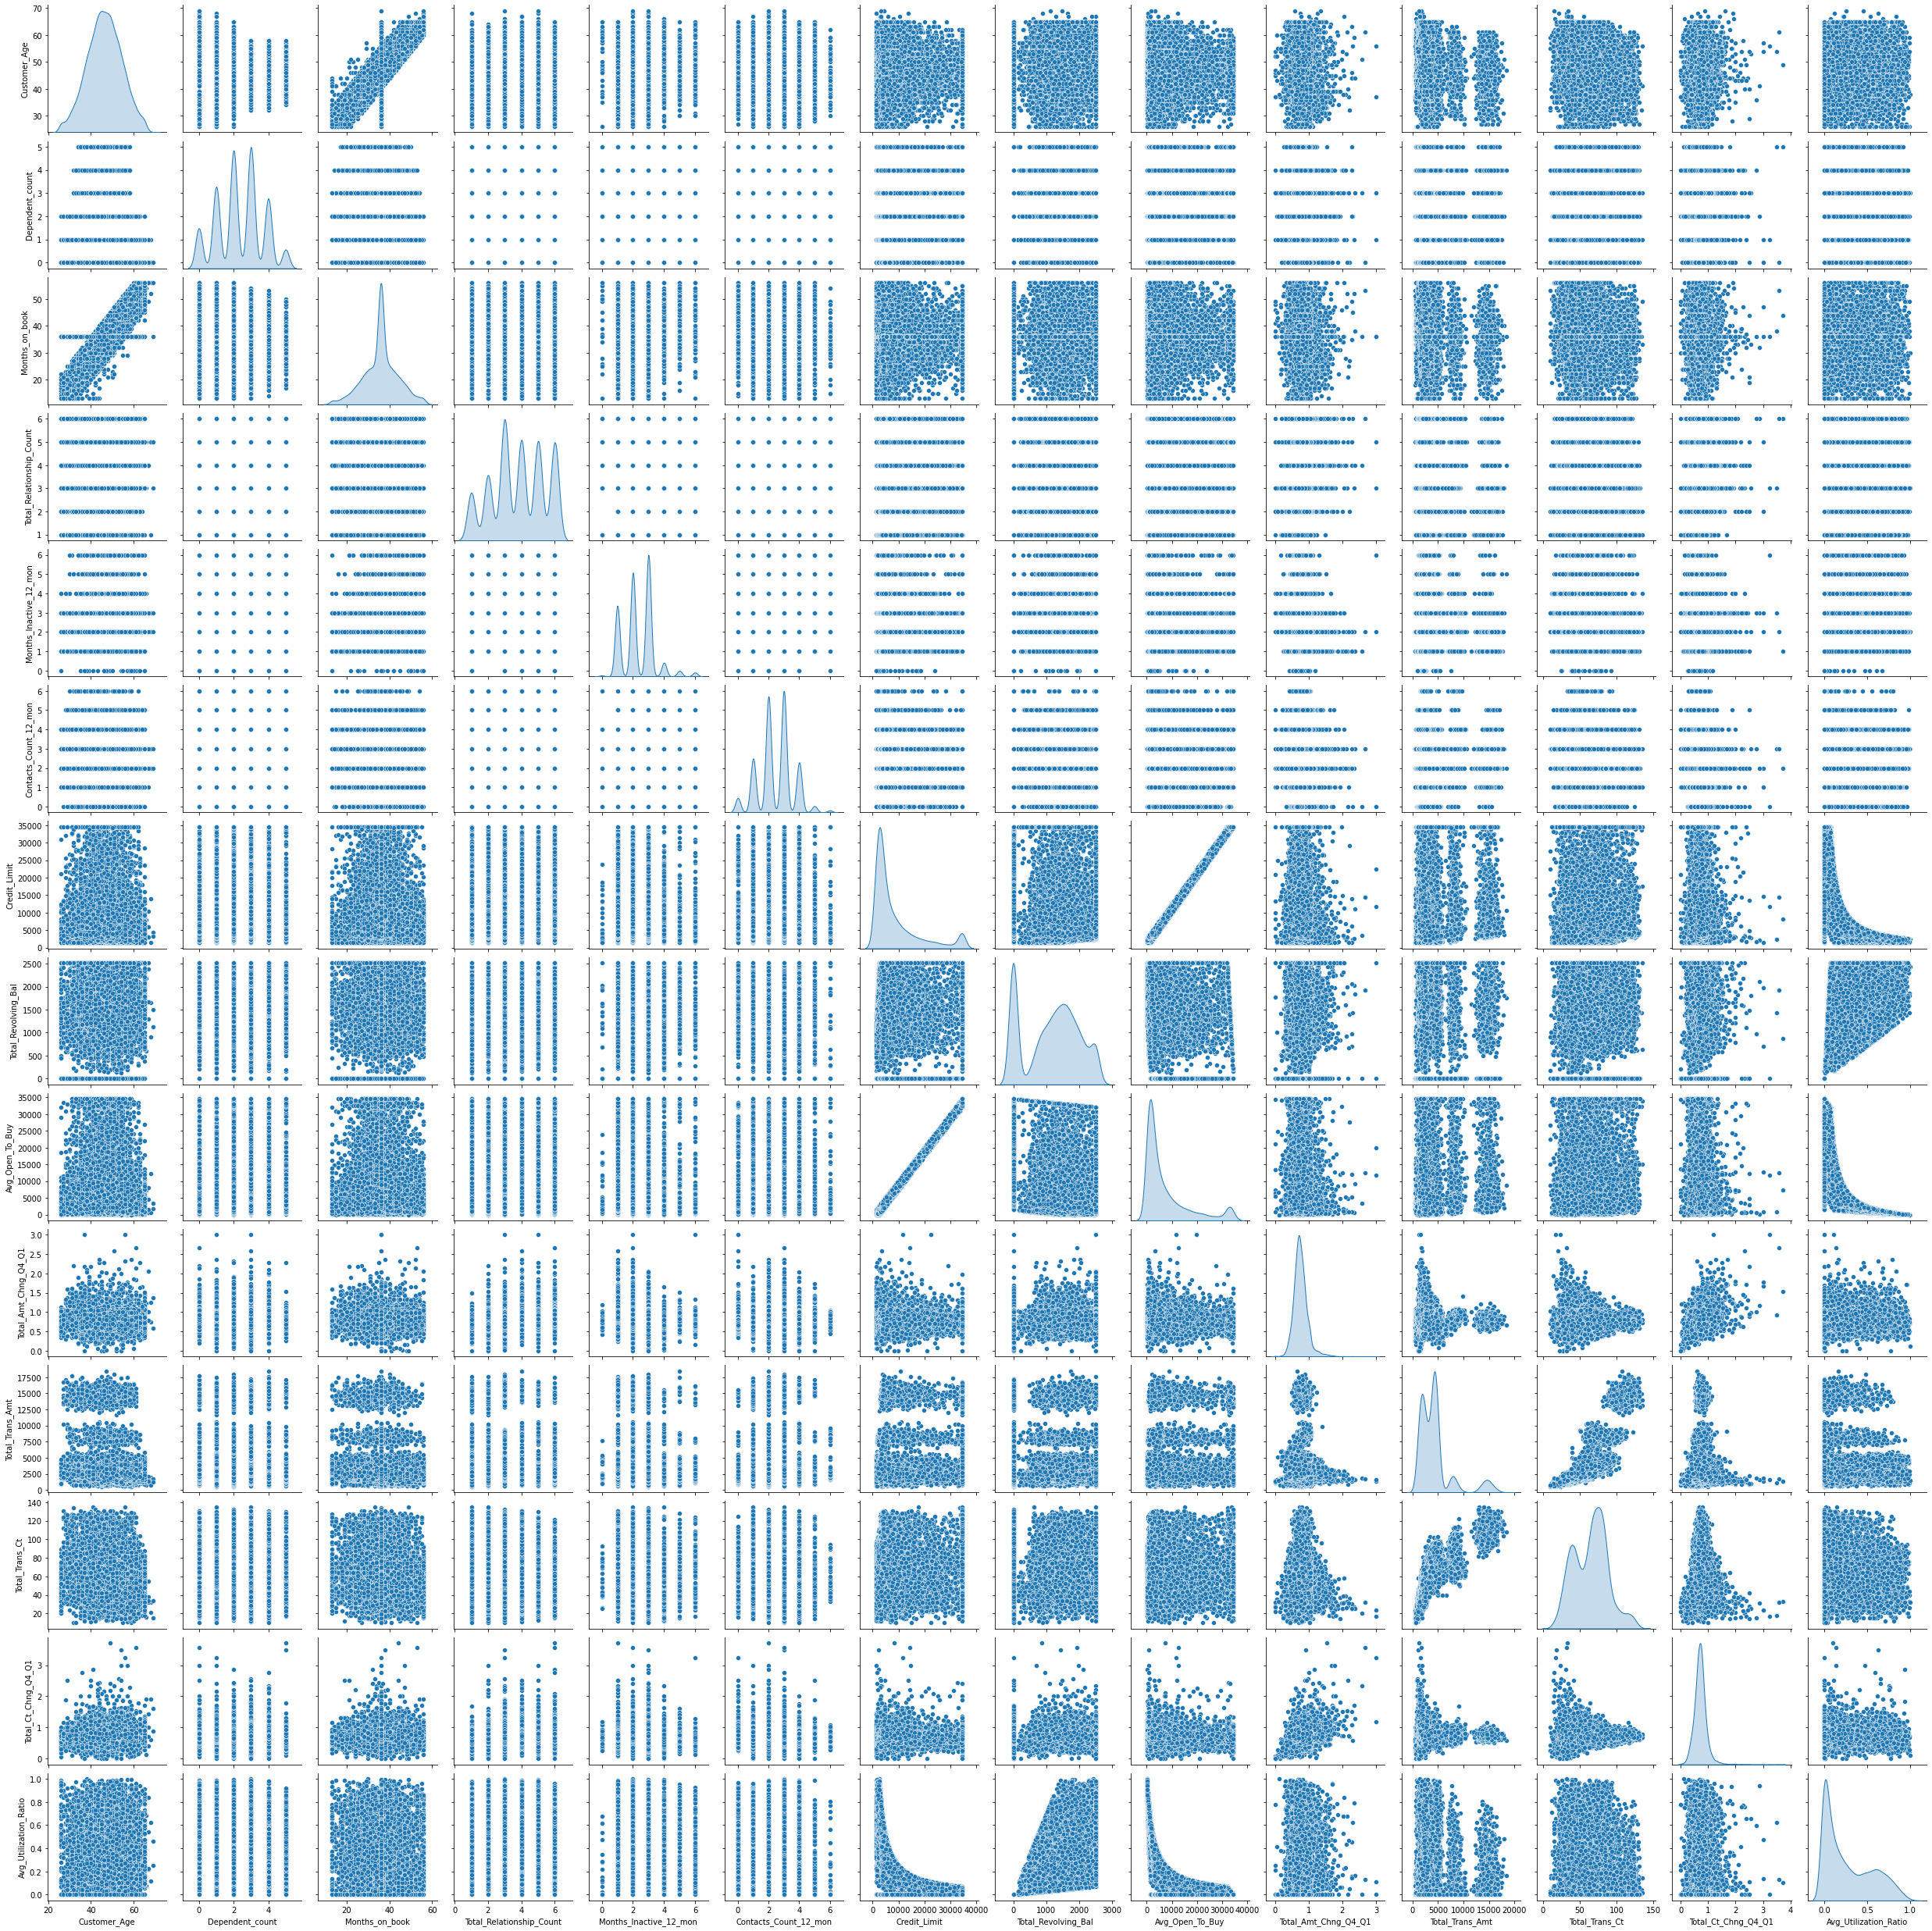

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

### Encoding:
* Encoding 1 and 0 to 'Existing Customer' and 'Attrited Customer' respectively in the target variable for analysis purposes.

In [18]:
data["Attrition_Flag"].replace(1, "Existing Customer", inplace=True)
data["Attrition_Flag"].replace(0, "Attrited Customer", inplace=True)

<IPython.core.display.Javascript object>

### Explore Avg_Open_To_Buy, Credit_Limit, Avg_Utilization_Ratio, and Total_Revolving_Bal

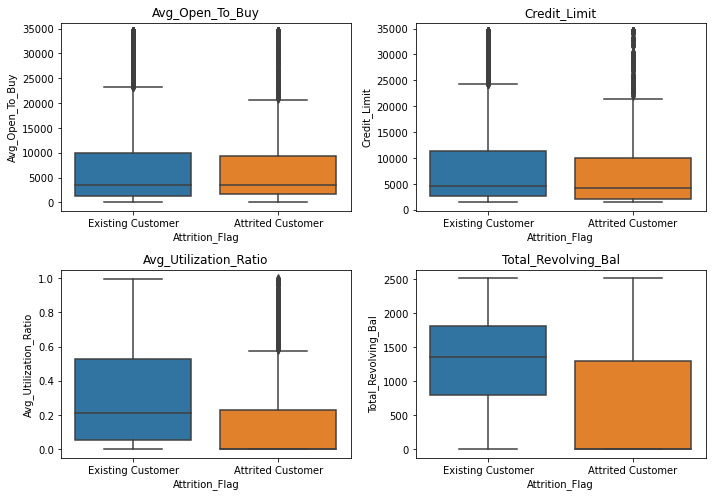

<IPython.core.display.Javascript object>

In [19]:
cols = data[
    [
        "Avg_Open_To_Buy",
        "Credit_Limit",
        "Avg_Utilization_Ratio",
        "Total_Revolving_Bal",
        
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observations:
* Their is no correlation between attrition flag and the average remaining balance left (Avg_Open_To_Buy) on the card or the credit limit. 
* Existing customers typically have a higher average utilization ration and total revolving balance. 
* We can drop the avg_open_to_buy feature because it offers the same information as the credit limit.  

Dropping Avg_Open_To_Buy 

In [20]:
data.drop(columns=["Avg_Open_To_Buy"], inplace=True)

<IPython.core.display.Javascript object>

### Total Transaction Amount, Total Transaction Count Vs. Attrition Flag

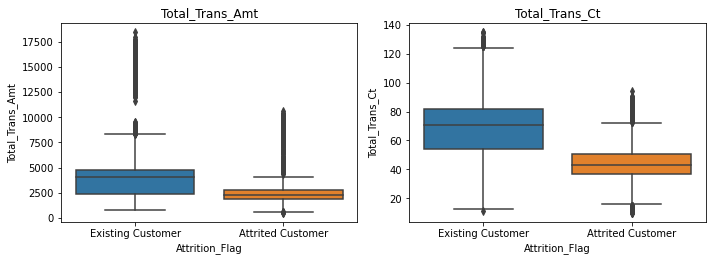

<IPython.core.display.Javascript object>

In [21]:
cols = data[
    [
        "Total_Trans_Amt",
        "Total_Trans_Ct",
       
        ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observations:
* Total transaction amount and total transaction count have an 81% correlation with each other, therefore one can be dropped. 
* Total transaction count has less outliers, and shows a more clear correlation with attrited flag. 
* Total transaction amount can be dropped. 

Dropping Total_Trans_Amt

In [22]:
data.drop(columns=["Total_Trans_Amt"], inplace=True)

<IPython.core.display.Javascript object>

In [23]:
### Function to plot distributions



def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))


    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Customer Age Vs. Attrition Flag

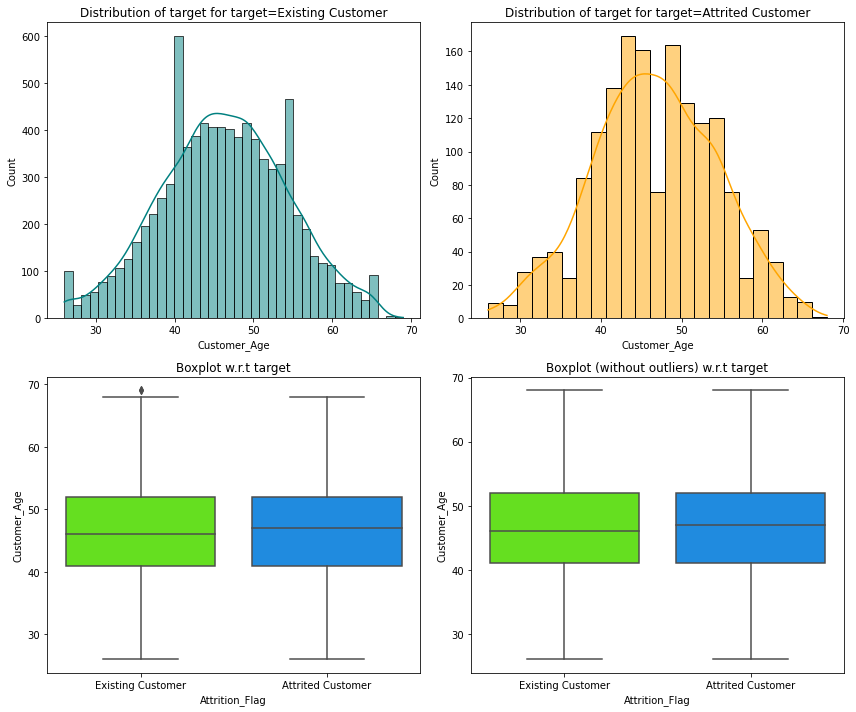

In [49]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

Observations:
* Their no correlation between customer's age and attrition flag.
* We can drop customer age because it does not add or take away from the dataset. 
* This feature offers similar information as the months_on_books feature. 
* The age in both categories of the target variable are normally distributed.

Drop customer age. 

In [24]:
data.drop(columns=["Customer_Age"], inplace=True)

<IPython.core.display.Javascript object>

### Dependent Count Vs. Attrition Flag

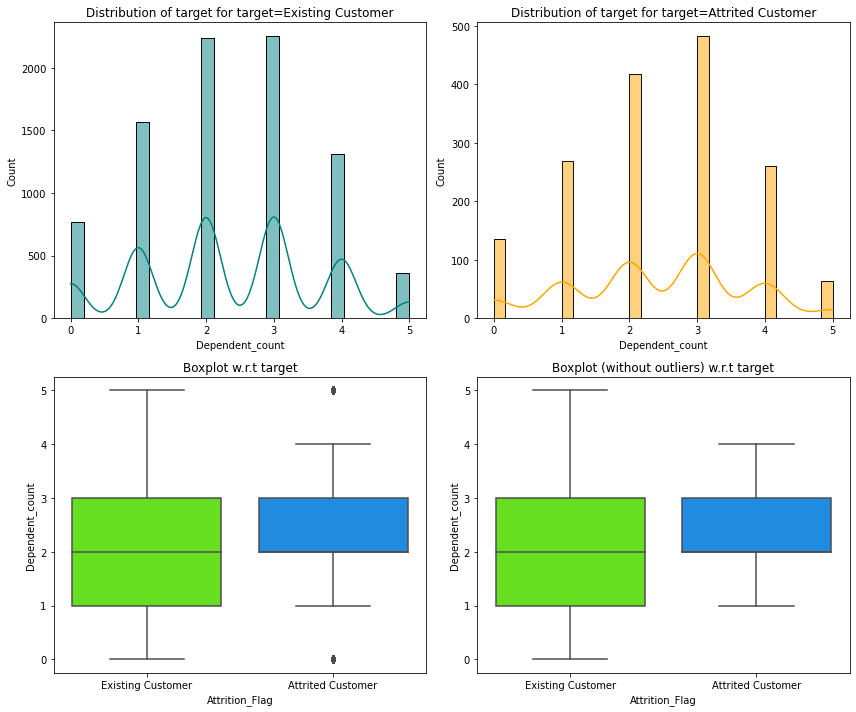

In [51]:
distribution_plot_wrt_target(data, "Dependent_count", "Attrition_Flag")

Observations:
* Existing customers have a wider range of dependents.
* Attrited customers has some outliers. 
* About 25% of both existing customers and attrited customers have 3 or more dependents.   

### Months with the bank Vs. Attrition Flag

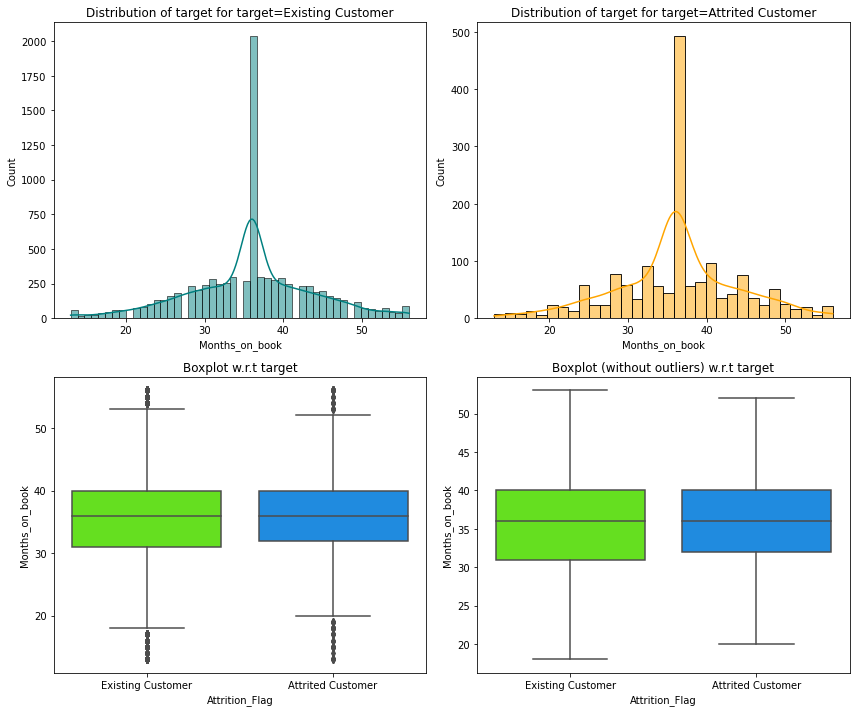

In [52]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")


Observations:
* Their is no correlation between attrition flag and number of months with the bank. 

### Total Products Vs. Attrition Flag

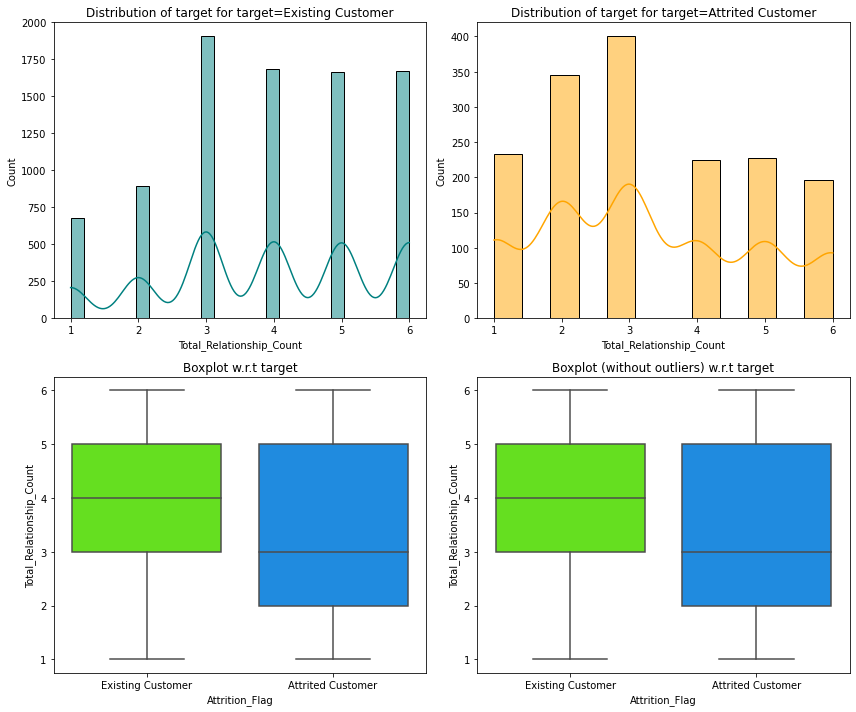

In [53]:
distribution_plot_wrt_target(data, "Total_Relationship_Count", "Attrition_Flag")

Observations:
* 50% of existing customers have between 3 and 5 products with the bank, while 50% of attrited customers have between 2 and 5 products. 
* Their are no outliers. 
* Both categories have a min of 1 and max of 6. 

### Inactive Months Vs. Attrition Flag

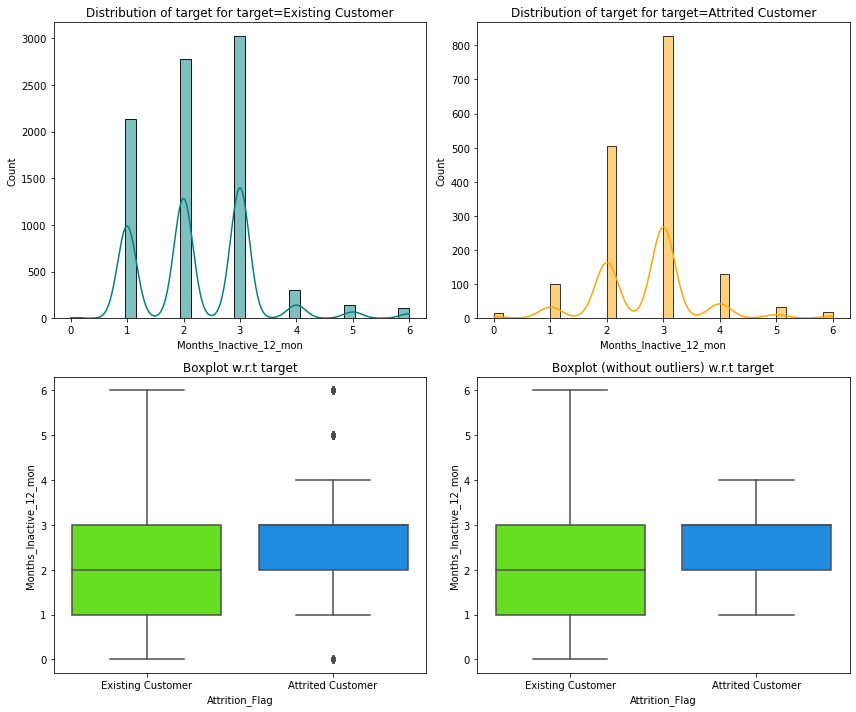

In [54]:
distribution_plot_wrt_target(data, "Months_Inactive_12_mon", "Attrition_Flag")

Observations:
* Existing customers generally have more inactive months with the exception of some outliers from attrited customers.
* 50% of existing customers have been inactive between 1 to 3 months. 
* 50% of attrited customers have been inactive between 2 to 3 months. 
* It is rare for an attrited customer to not be inactive at all. 

### No. of Contacts Vs. Attrition Flag

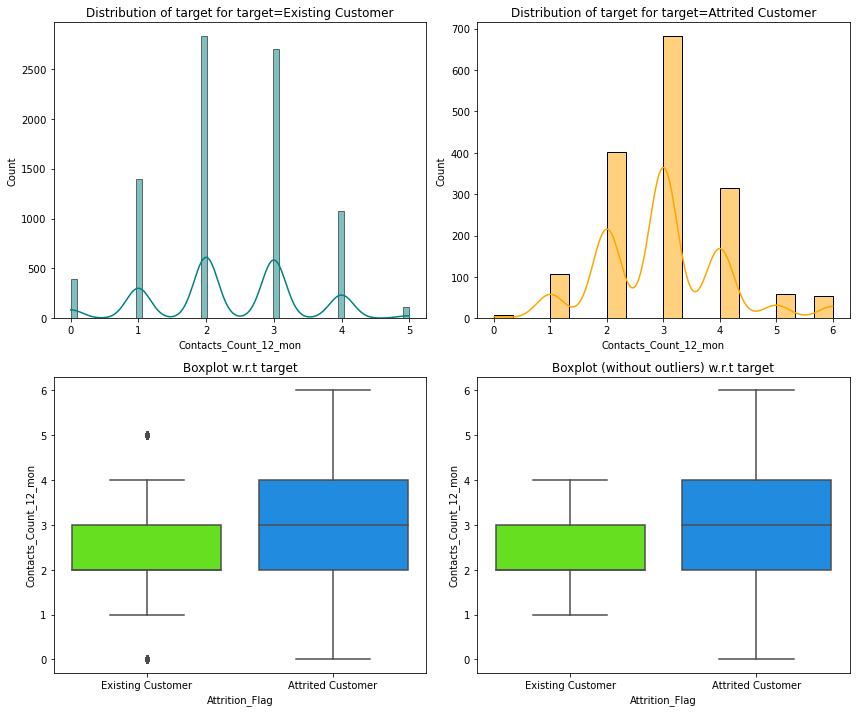

In [55]:
distribution_plot_wrt_target(data, "Contacts_Count_12_mon", "Attrition_Flag")

Observations:
* Attrited customers have a wider range of contacts. 
* There is no strong correlation


### Total Revolving Balance Vs. Attrition Flag

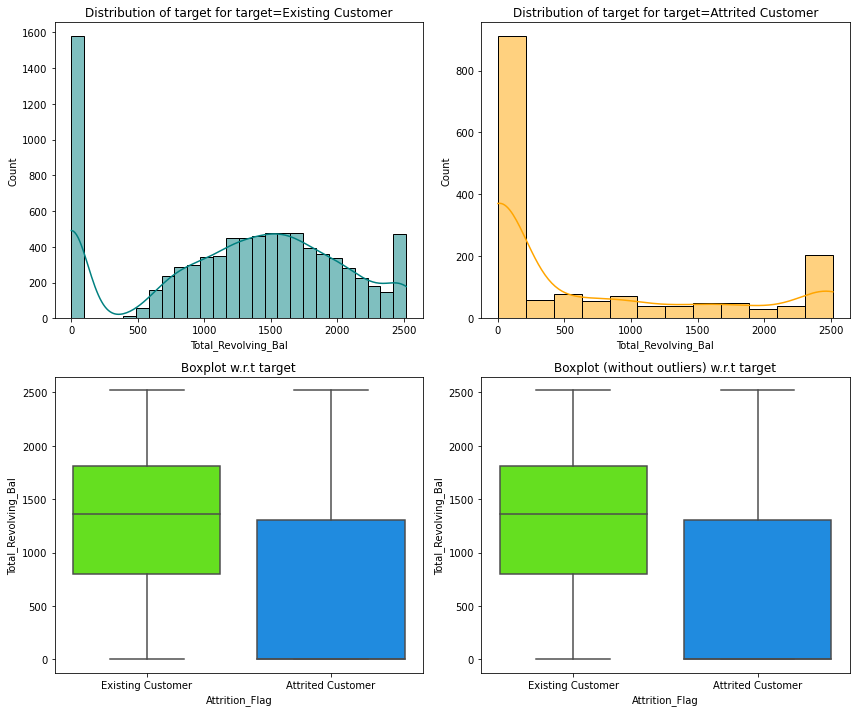

In [56]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

Observations:
* There is a positive correlation between attrited flag, and total revolving balance. 
* Attrited customers generally have less revolving balance. 
* About 25% of attrited customers have a revolving balance greater than 1,000.
* About 75% of the existing customers have a revolving balance greater than 1,000.
* Majority of the customers with revolving balances are existing customers.

### Total Change from Q4-Q1 Vs. Attrition Flag 

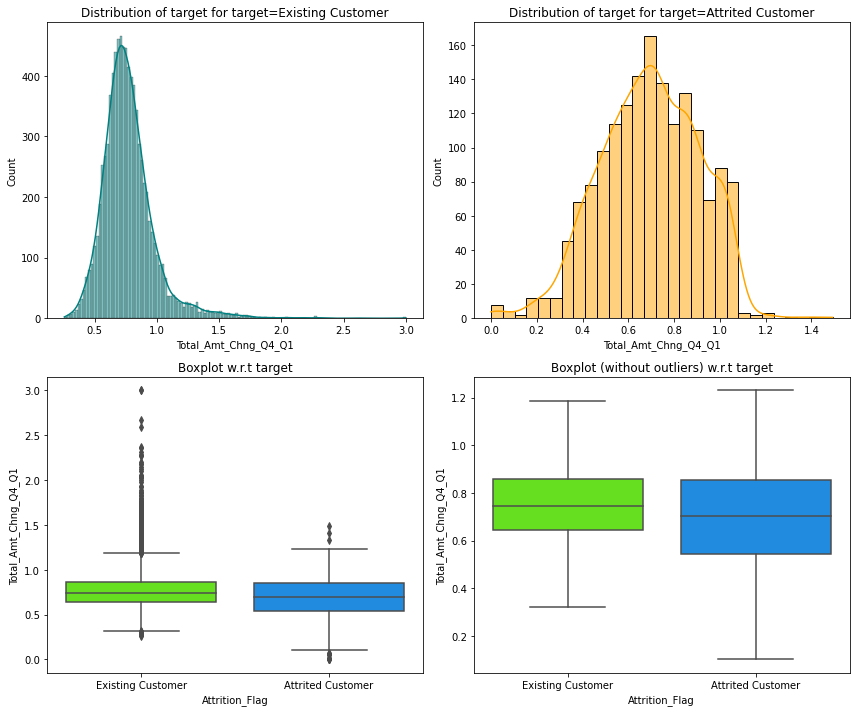

<IPython.core.display.Javascript object>

In [84]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

Observation:
* Their are a lot of outliers.
* Most existing customers have less than 1% change in transaction amount.
* Attrited customers is more evenly distributed between 0% and 1.4%. 
 

### Total Change in Transaction Counts Vs. Attrition Flag

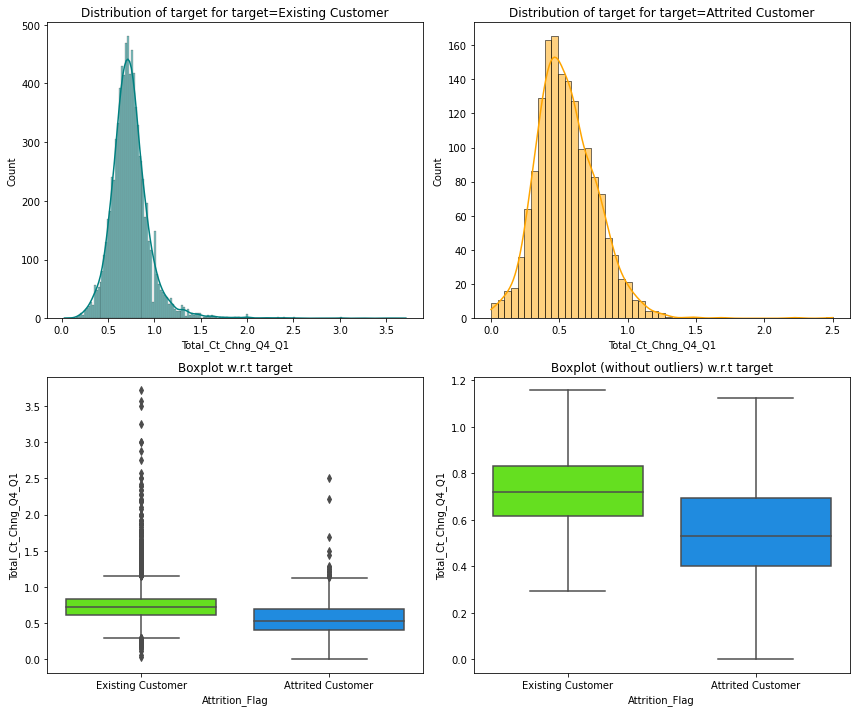

In [58]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

Observations:
* Their are a lot of outliers.
* Without the outliers we can see a positive correlation between total count change and attrition flag. 

### Average Utilization Ratio Vs. Attrition Flag

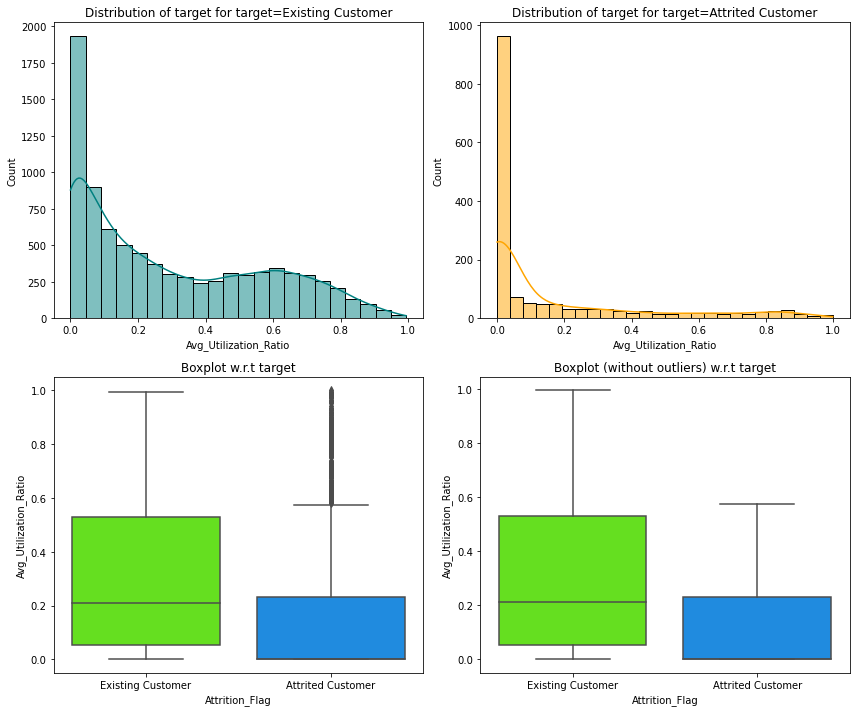

In [59]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

Observations: 
* The correlation is hard to tell due to the outliers in the attrited customers category. 
* Existing customers use their cards more than attrited customers. 
* Both existing and attrited customers are right skewed with majority of customers at 0 utilixation ratio. 

### 2. Categorical Features


In [27]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Gender Vs. Attrition Flag

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


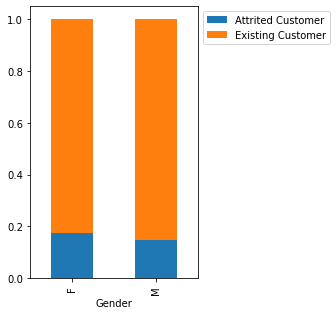

In [61]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Observations:
* The amount of male and female existing customers is fairly close. 

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


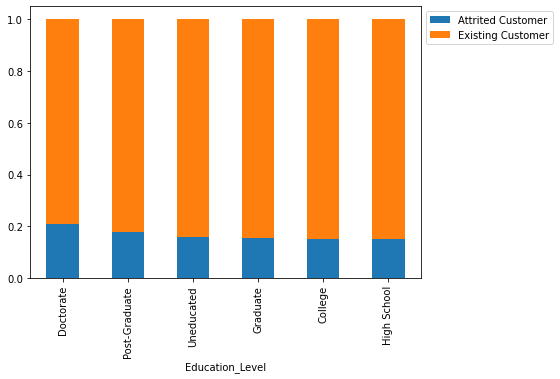

In [62]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

In [63]:
data["Education_Level"]

0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123            NaN
10124    High School
10125       Graduate
10126       Graduate
Name: Education_Level, Length: 10127, dtype: object

Observations:
* High schoolers and graduate students make up most of the dataset.
* Each category has more existing customers than attrited customers.
* We have some missing values. 

### Marital Statis Vs. Attrition Flag

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


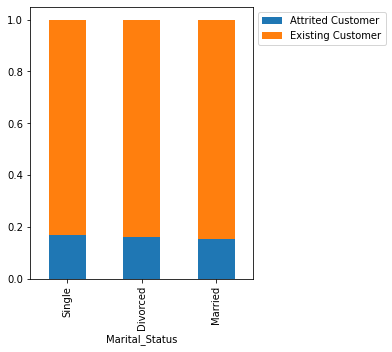

In [64]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")


In [65]:
data["Marital_Status"]

0         Married
1          Single
2         Married
3             NaN
4         Married
           ...   
10122      Single
10123    Divorced
10124     Married
10125         NaN
10126     Married
Name: Marital_Status, Length: 10127, dtype: object

Observations:
* 92% of the dataset is either single or married. 
* We have some missing values. 

### Income Vs. Attrited Flag

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


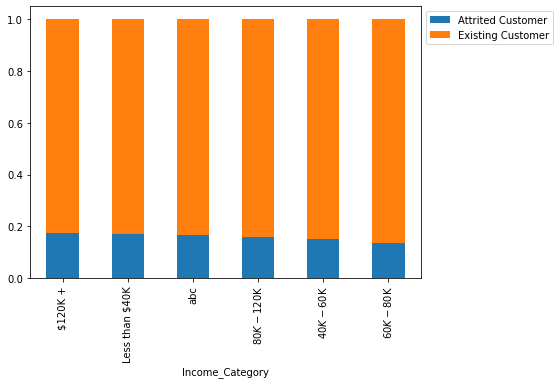

In [66]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")


Observations:
* Only 7% of the dataset makes over $120K.
* We have some missing values. 

In [67]:
data["Income_Category"]

0           $60K - $80K
1        Less than $40K
2          $80K - $120K
3        Less than $40K
4           $60K - $80K
              ...      
10122       $40K - $60K
10123       $40K - $60K
10124    Less than $40K
10125       $40K - $60K
10126    Less than $40K
Name: Income_Category, Length: 10127, dtype: object

Convert all abc values in Income Category to NaN.

In [25]:
data[data == 'abc'] = np.nan

<IPython.core.display.Javascript object>

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7575  9015
Less than $40K                 612               2949  3561
$40K - $60K                    271               1519  1790
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                601   727
------------------------------------------------------------------------------------------------------------------------


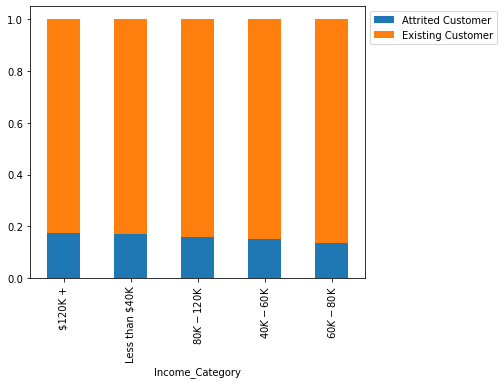

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")


* Income Category now shows missing values.
* 'abc' category is now gone. 

### Card Category Vs. Attrition Flag

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


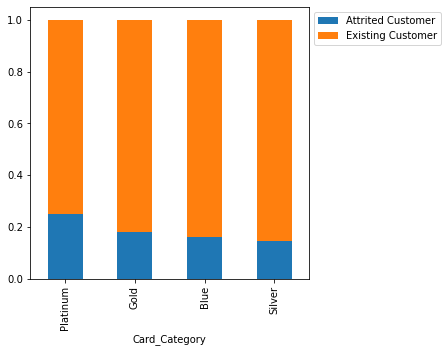

In [70]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

Observations:
* Their is a 25% chance someone with a Platinum card will attrition.
* Most individuals have blue cards. 
* Their is a 15% chance someone with a blue card with attrition.  

# Data Preparation


### Treat missing values
* We will use SimpleImputer to impute values for NaN. 
* Strategy will be set to 'most_frequent', which will replace missing values with the most frequent value in the column. 
* We will encode gdummy variables to handle categorical featuress. 

In [29]:
imputer = SimpleImputer(strategy="most_frequent")


<IPython.core.display.Javascript object>

In [30]:
data2 = data.copy()

<IPython.core.display.Javascript object>

### Defining X and Y

In [80]:
X = data2.drop(["Attrition_Flag"], axis=1)

Y = data2["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

<IPython.core.display.Javascript object>

1= Attrited 
0= Existing

### Split the dataset

In [81]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 16) (2026, 16) (2026, 16)


<IPython.core.display.Javascript object>

### Create a variable for all columns with missing values

In [33]:
cols_for_impute = [
    'Education_Level',
    'Marital_Status',
    'Income_Category'
]

<IPython.core.display.Javascript object>

In [34]:
data2[cols_for_impute].head()

Education_Level Marital_Status Income_Category
0     High School        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3     High School            NaN  Less than $40K
4      Uneducated        Married     $60K - $80K

<IPython.core.display.Javascript object>

### Imputing missing values

In [35]:
X_train[cols_for_impute] = imputer.fit_transform(X_train[cols_for_impute])
X_val[cols_for_impute] = imputer.transform(X_val[cols_for_impute])
X_test[cols_for_impute] = imputer.transform(X_test[cols_for_impute])

<IPython.core.display.Javascript object>

In [36]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

### Checking for missing values

In [37]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

<IPython.core.display.Javascript object>

### Creating dummy variables

In [38]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 26) (2026, 26) (2026, 26)


<IPython.core.display.Javascript object>

# Building the Model

## False Prediction
1. Predicting a customer will remain with the bank and use their credit card and the customer does not stay.Loss of resources. 
2. Predicting a customer will leave the bank and no longer use their credit card, and the customer stays. Lose opportunity to advertise and promote more deals to customer. 

## What case is more important?
* Predicting a customer will leave the bank and no longer use their credit card, and the customer stays is most important to the bank. This situation can cause the bank to miss a chance to upsale, and offer the best deals that will keep the customer at the bank long term. 

## Reduce the False Negative
* I will use the recall metric because it lessens the chance for false negatives. 

***I will start by building models using Decision Tree Classifier, Random Forest Classifier, AdaBoosting Classifier, Gradient Boosting Classifier, XGBoost Classifier without hyperparameters. I will then explore the cross_validation. Cross validation is a technique that evaluates the prediction of the model performance.The scoring will be set to recall as it is the most important metric for this project.*** 

In [39]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Random forest: 63.831501831501825
GBM: 68.5468341182627
Adaboost: 68.6473050758765
Xgboost: 71.30873888016744
dtree: 64.14442700156985

Validation Performance:

Random forest: 0.6840490797546013
GBM: 0.7300613496932515
Adaboost: 0.7331288343558282
Xgboost: 0.7423312883435583
dtree: 0.6503067484662577


<IPython.core.display.Javascript object>

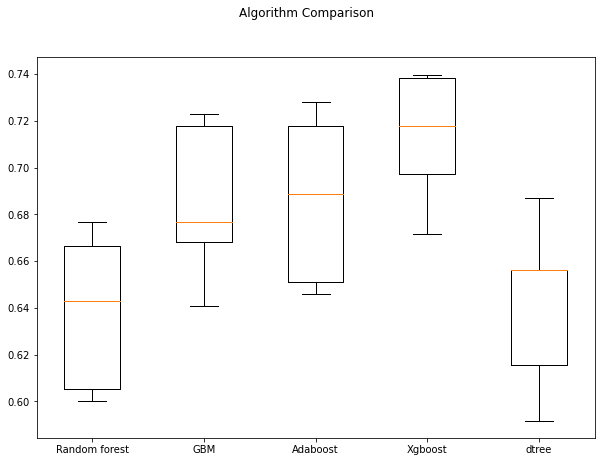

<IPython.core.display.Javascript object>

In [40]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

observations:
* Xgboost gives the highest cross validation recall score. 
* Adaboost gives the 2nd highest score, closely followed by GBM.  
* All the model give a recall score greater than 90.
* All the models perform fairly with both cross validation performance and validation.
* I will tune the best 2 models using GridSearchCV and RandomizedSearchCV


## Hyperparameter Tuning

In [41]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [42]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Adaboost

### GridSearchCV

In [43]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 1, 'n_estimators': 60} 
Score: 0.7459549973835687
CPU times: user 4.09 s, sys: 687 ms, total: 4.77 s
Wall time: 4min 19s


<IPython.core.display.Javascript object>

In [44]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=60,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=60, random_state=1)

<IPython.core.display.Javascript object>

In [45]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.952   0.824      0.869 0.846

<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.932   0.755      0.809 0.781

<IPython.core.display.Javascript object>

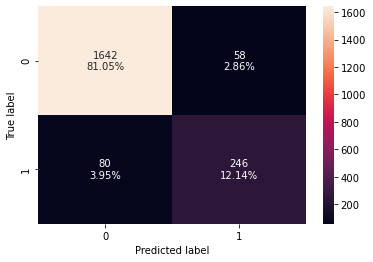

<IPython.core.display.Javascript object>

In [47]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

Observations:
* The validation recall is similar to the validation recall before tuning. 
* The difference between the validation and training recall is too great.
* The training recall may be a bit overfit. 

### RandomizedSearchCV

In [48]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7397645211930927:
CPU times: user 1.66 s, sys: 234 ms, total: 1.89 s
Wall time: 1min 23s


<IPython.core.display.Javascript object>

In [49]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, random_state=1)

<IPython.core.display.Javascript object>

In [50]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.948   0.803      0.866 0.834

<IPython.core.display.Javascript object>

In [51]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.931   0.748      0.808 0.777

<IPython.core.display.Javascript object>

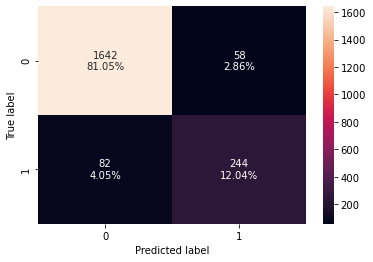

<IPython.core.display.Javascript object>

In [52]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

Observations

* The results in both GridSearch and RandomizedSearch are very similiar.
* The recall score for both validation and traing set slightly decreased.  
* The false negative in the confusion matrix increased by 2. 
* The GridSearch took a much longer time to run. 

## Xgboost

### GridSearchCV

In [53]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 10, 'subsample': 1} with CV score=0.9354369440083726:
CPU times: user 59.3 s, sys: 10.6 s, total: 1min 9s
Wall time: 42min 2s


<IPython.core.display.Javascript object>

In [54]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    subsample=1,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=3,
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

<IPython.core.display.Javascript object>

In [55]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.717   0.959      0.358 0.521

<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.718   0.942      0.357 0.518

<IPython.core.display.Javascript object>

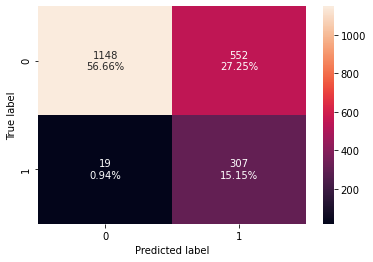

<IPython.core.display.Javascript object>

In [57]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

Observations:
* The recall on the training set with Xgboost increased by 13%.
* The recall on the validation set with Xgboost increased by 19%.
* The precision score is less than 50%.
* The false negative in the confusion matrix decreased. 


### RandomizedSearchCV

In [58]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9334013605442177:
CPU times: user 2.31 s, sys: 250 ms, total: 2.56 s
Wall time: 1min 18s


<IPython.core.display.Javascript object>

In [60]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.8,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

<IPython.core.display.Javascript object>

In [61]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.801   0.957      0.444 0.607

<IPython.core.display.Javascript object>

In [62]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.795   0.933      0.436 0.594

<IPython.core.display.Javascript object>

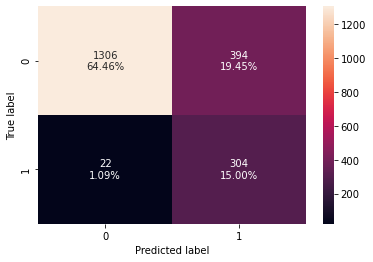

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

Observations:
* The recall on the training set remains at 96%. 
* The recall on the validation set is also very close to the validation set using GridSearchCV
* The recall between the training and validation set have very little variance. 
* The false negative on the confusion matrix is still fairly low. 

## Comparing all Models

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost_Tuned_Grid_Search",
    "AdaBoost_Tuned_Random_Search",
    "XGBoost_Tuned_Grid_Search",
    "XGBoost_Tuned_Random_Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost_Tuned_Grid_Search  AdaBoost_Tuned_Random_Search  \
Accuracy                        0.952                         0.948   
Recall                          0.824                         0.803   
Precision                       0.869                         0.866   
F1                              0.846                         0.834   

           XGBoost_Tuned_Grid_Search  XGBoost_Tuned_Random_Search  
Accuracy                       0.717                        0.801  
Recall                         0.959                        0.957  
Precision                      0.358                        0.444  
F1                             0.521                        0.607

<IPython.core.display.Javascript object>

In [65]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        xgboost_grid_val.T,
        xgboost_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost_Tuned_Grid_Search",
    "AdaBoost_Tuned_Random_Search",
    "XGBoost_Tuned_Grid_Search",
    "XGBoost_Tuned_Random_Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


AdaBoost_Tuned_Grid_Search  AdaBoost_Tuned_Random_Search  \
Accuracy                        0.932                         0.931   
Recall                          0.755                         0.748   
Precision                       0.809                         0.808   
F1                              0.781                         0.777   

           XGBoost_Tuned_Grid_Search  XGBoost_Tuned_Random_Search  
Accuracy                       0.718                        0.795  
Recall                         0.942                        0.933  
Precision                      0.357                        0.436  
F1                             0.518                        0.594

<IPython.core.display.Javascript object>

Observations:
* The model ran with Xgboost GridSearch gave the best validation and training set recall.
* I will now test the models performance on the test set. 

## Performance on the test set

In [66]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.708   0.942      0.349 0.509

<IPython.core.display.Javascript object>

Observations
* The model performs well with a 94% recall. 

## Features Importance

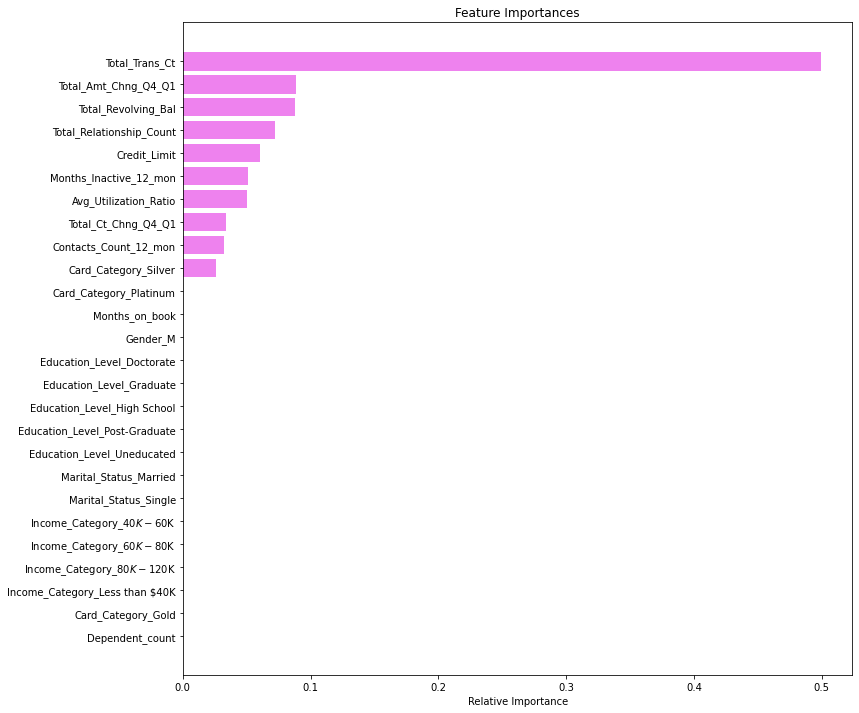

<IPython.core.display.Javascript object>

In [71]:
feature_names = X_train.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations
* The total transaction count is the most important feature.
* The change in transaction amount ffrom Q4 to Q1 is second. 

# Pipelines for productionizing the model
- Now, we have a final model we will now use pipeline for optimal results. 


In [74]:
# First Pipeline: creating a list of numerical variables
numerical_features = [
    "Credit_Limit" ,
    "Avg_Utilization_Ratio",
    "Total_Revolving_Bal",
    "Total_Trans_Ct",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# Second Pipeline: creating a list of categorical variables
categorical_features = ["Education_Level", "Marital_Status", "Income_Category", "Gender", "Card_Category"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [76]:
# Separating target variable and other variables
X = data2.drop(columns="Attrition_Flag")
Y = data2["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [77]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


<IPython.core.display.Javascript object>

In [82]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.01,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=5,
                max_depth=3,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Credit_Limit',
                                                   'Avg_Utilization_Ratio',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Ct',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                    

<IPython.core.display.Javascript object>

# Conclusion

1. The bank should target customers who frequently use their card.
2. Individuals with blue cards are 10% less likely to attrition than individuals with platinum cards.
3. The bank should promote more rewards and benefits to platinum card members. 
4. College students and people who have graduated college are the least likely to attrition. 
5. The banks should put more resources towards promoting to college students and individuals with college degrees. 
